In [2]:
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# Define the command to run the executable
command = "C:/Users/tus88262/Documents/GitHub/2019-test-ppq-pk/build/Debug/run_ppq_pk.exe --lum --pmf 0.2"

In [4]:
output = subprocess.run(command, capture_output=True, text=True)

In [8]:
# Split the output into lines
lines = output.stdout.splitlines()

In [10]:
# Create a dataframe to store the C++ program code
df = pd.DataFrame([line.split(',') for line in lines], columns=["PID","HOUR","COMP2CONC","PARASITEDENSITY"])
df = df.iloc[1:]
df = df.apply(pd.to_numeric, errors='coerce')

In [12]:
# Write the dataframe to a CSV file
#df.to_csv(f'C:/Users/tus88262/Documents/GitHub/antimalarial_pk_pd/out.lum.20240530_{i}.csv', index=True)

Text(0.5, 1.0, 'Hour vs Comp2Conc')

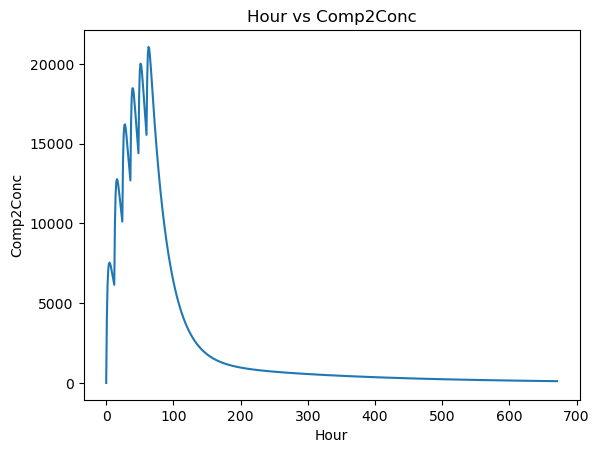

In [14]:
#Plotting Concentration as a function of Time
plt.plot(df['HOUR'],df['COMP2CONC'])
plt.xlabel('Hour')  # X-axis label
plt.ylabel('Comp2Conc')  # Y-axis label
plt.title('Hour vs Comp2Conc')  # Plot title

In [16]:
# Running model for 10 patients
command_10_patients = "C:/Users/tus88262/Documents/GitHub/2019-test-ppq-pk/build/Debug/run_ppq_pk.exe --lum --pmf 0.2 -n 10"
output_10_patients = subprocess.run(command_10_patients, capture_output=True, text=True)
lines_10_patients = output_10_patients.stdout.splitlines()
df_10_patients = pd.DataFrame([line.split(',') for line in lines_10_patients], columns=["PID","HOUR","COMP2CONC","PARASITEDENSITY"])
df_10_patients = df_10_patients.iloc[1:]
df_10_patients = df_10_patients.apply(pd.to_numeric, errors='coerce')

In [18]:
df_10_patients

,PID,HOUR,COMP2CONC,PARASITEDENSITY
1,0,0.0,0.000,1000.000
2,0,1.0,2907.664,1004.175
3,0,2.0,4753.697,1008.368
4,0,3.0,5890.738,1012.578
5,0,4.0,6555.478,1016.804
...,...,...,...,...
6716,9,667.0,123.967,0.041
6717,9,668.0,123.434,0.042
6718,9,669.0,122.904,0.042
6719,9,670.0,122.375,0.042


In [20]:
# Write the dataframe to a CSV file
df_10_patients.to_csv(f'C:/Users/tus88262/Documents/GitHub/2019-test-ppq-pk/plots/lum/df_10_patients.csv', index=True)

C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


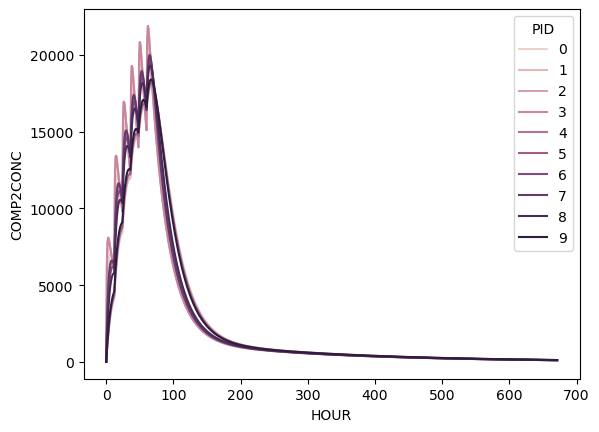

In [22]:
#Creating a spaghetti plot using seaborn
sns.lineplot(x='HOUR', y='COMP2CONC', hue='PID', data=df_10_patients, legend = "full")
plt.show()

# **sns.lineplot**

### **Reference**
https://seaborn.pydata.org/generated/seaborn.lineplot.html <br>
https://seaborn.pydata.org/tutorial/error_bars.html

### **Options**

1. **estimator**: *Name of pandas method or callable or None* <br>
   Method for aggregating across multiple observations of the y variable at the same x level. If None, all observations will be drawn. <br>

2. **errorbar**: *string, (string, number) tuple, or callable* <br>
   Name of errorbar method (either “ci”, “pi”, “se”, or “sd”), or a tuple with a method name and a level parameter, or a function that maps from a vector to a (min, max) interval, or None to hide errorbar. See the errorbar tutorial for more information.



C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


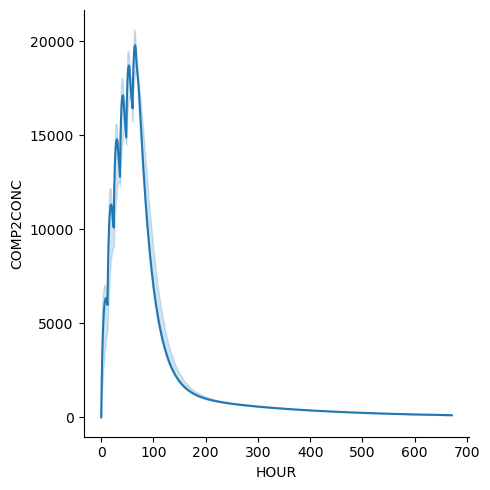

In [25]:
sns.relplot(x='HOUR', y='COMP2CONC', estimator='median', errorbar=('ci', 95), data=df_10_patients, kind="line")
plt.show()

In [26]:
df_10_patients_wide = df_10_patients.pivot(index="HOUR", columns="PID", values="COMP2CONC")
df_10_patients_wide

PID,0,1,2,3,4,5,6,7,8,9
HOUR,,,,,,,,,,
0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1.0,2907.664,634.624,6152.729,6210.366,1995.498,686.962,1680.594,2160.321,1307.636,757.455
2.0,4753.697,1199.934,7801.997,7834.438,3467.465,1294.851,2979.854,3713.772,2373.451,1421.717
3.0,5890.738,1701.836,8087.120,8099.212,4536.784,1830.817,3972.627,4811.531,3235.096,2001.880
4.0,6555.478,2145.775,7964.652,7966.848,5296.961,2301.415,4719.440,5567.749,3924.571,2506.214
...,...,...,...,...,...,...,...,...,...,...
667.0,112.963,127.039,110.975,110.957,114.666,125.585,115.693,114.250,117.573,123.967
668.0,112.473,126.495,110.492,110.475,114.169,125.046,115.192,113.755,117.065,123.434
669.0,111.984,125.952,110.012,109.994,113.674,124.510,114.693,113.261,116.559,122.904


C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


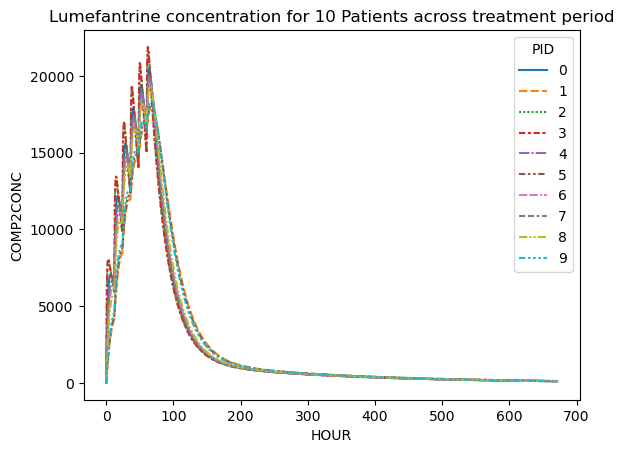

In [29]:
sns.lineplot(data=df_10_patients_wide).set(title='Lumefantrine concentration for 10 Patients across treatment period', ylabel='COMP2CONC')
plt.show()

C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


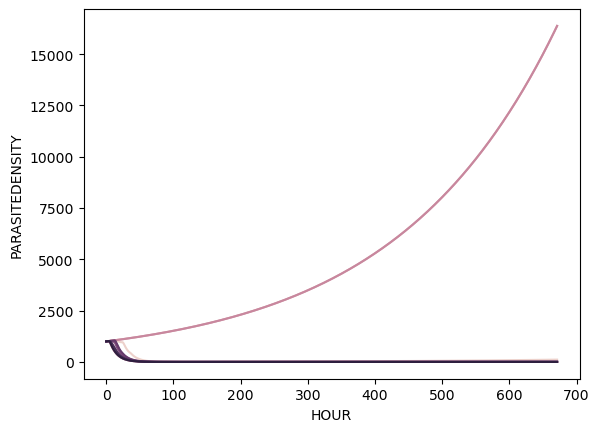

In [31]:
#Creating a spaghetti plot using seaborn
sns.lineplot(x='HOUR', y='PARASITEDENSITY', hue='PID', data=df_10_patients, legend=False)
plt.show()

C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


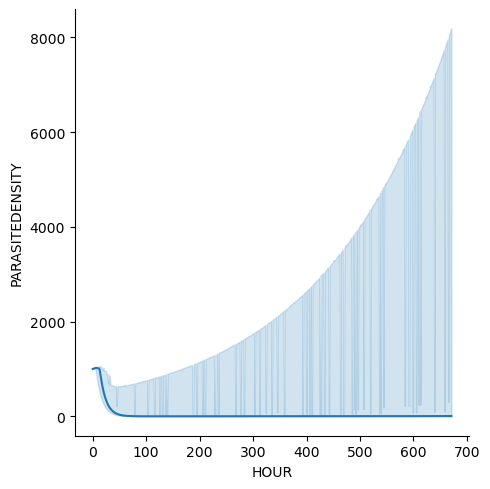

In [33]:
sns.relplot(x='HOUR', y='PARASITEDENSITY', estimator='median', errorbar=('ci', 95), data=df_10_patients,kind="line")
plt.show()

In [35]:
df_10_patients_wide_02 = df_10_patients.pivot(index="HOUR", columns="PID", values="PARASITEDENSITY")
df_10_patients_wide_02

PID,0,1,2,3,4,5,6,7,8,9
HOUR,,,,,,,,,,
0.0,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
1.0,1004.175,1004.175,1004.175,1004.175,1004.175,1004.175,1004.175,1004.175,1004.175,1004.175
2.0,1008.368,1008.368,1008.368,1008.368,1008.368,1008.368,1008.368,1008.368,1008.368,1008.368
3.0,1012.578,1012.484,1012.578,1012.578,1012.576,1012.496,1012.572,1012.577,1012.561,1012.509
4.0,1016.804,1012.866,1016.806,1016.806,1016.762,1013.441,1016.676,1016.781,1016.349,1014.095
...,...,...,...,...,...,...,...,...,...,...
667.0,110.334,0.013,16104.039,16104.400,7.430,0.022,3.263,11.012,0.823,0.041
668.0,110.795,0.013,16171.280,16171.642,7.461,0.023,3.277,11.058,0.827,0.042
669.0,111.257,0.013,16238.801,16239.164,7.492,0.023,3.291,11.104,0.830,0.042


C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


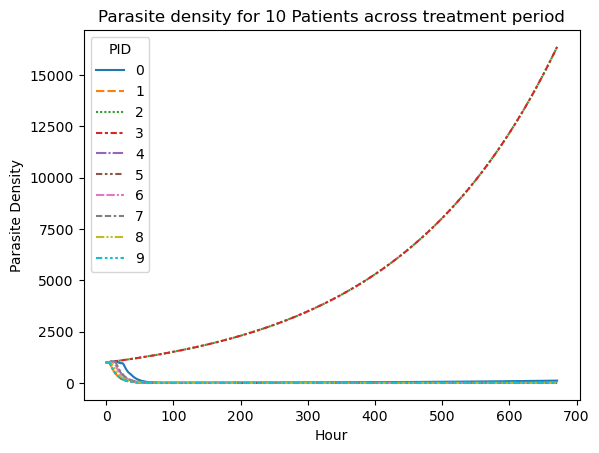

In [37]:
sns.lineplot(data=df_10_patients_wide_02).set(title='Parasite density for 10 Patients across treatment period', ylabel='Parasite Density',xlabel='Hour')
plt.show()

In [39]:
# Running model for 100 patients
command_100_patients = "C:/Users/tus88262/Documents/GitHub/2019-test-ppq-pk/build/Debug/run_ppq_pk.exe --lum --pmf 0.2 -n 100"
output_100_patients = subprocess.run(command_100_patients, capture_output=True, text=True)
lines_100_patients = output_100_patients.stdout.splitlines()
df_100_patients = pd.DataFrame([line.split(',') for line in lines_100_patients], columns=["PID","HOUR","COMP2CONC","PARASITEDENSITY"])
df_100_patients = df_100_patients.iloc[1:]
df_100_patients = df_100_patients.apply(pd.to_numeric, errors='coerce')

In [41]:
df_100_patients

,PID,HOUR,COMP2CONC,PARASITEDENSITY
1,0,0.0,0.000,1000.000
2,0,1.0,1537.929,1004.175
3,0,2.0,2751.591,1008.368
4,0,3.0,3699.577,1012.569
5,0,4.0,4430.196,1016.595
...,...,...,...,...
67196,99,667.0,130.509,0.004
67197,99,668.0,129.951,0.004
67198,99,669.0,129.396,0.004
67199,99,670.0,128.843,0.004


Text(0.5, 1.0, 'Lumefantrine concentration for 100 Patients across treatment period')

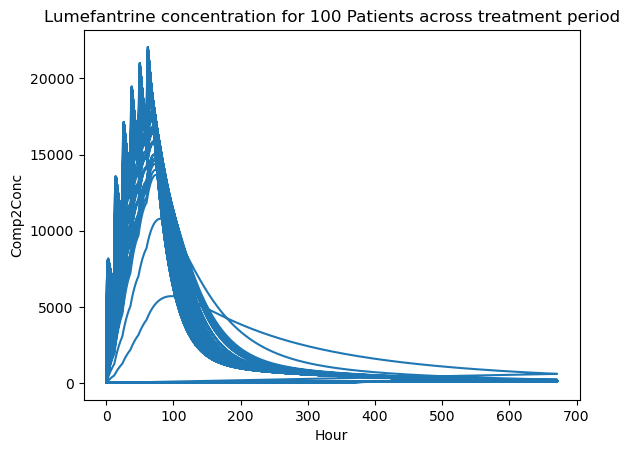

In [43]:
#Plotting Concentration as a function of Time for 100 patients
plt.plot(df_100_patients['HOUR'],df_100_patients['COMP2CONC'])
plt.xlabel('Hour')  # X-axis label
plt.ylabel('Comp2Conc')  # Y-axis label
plt.title('Lumefantrine concentration for 100 Patients across treatment period')  # Plot title

C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


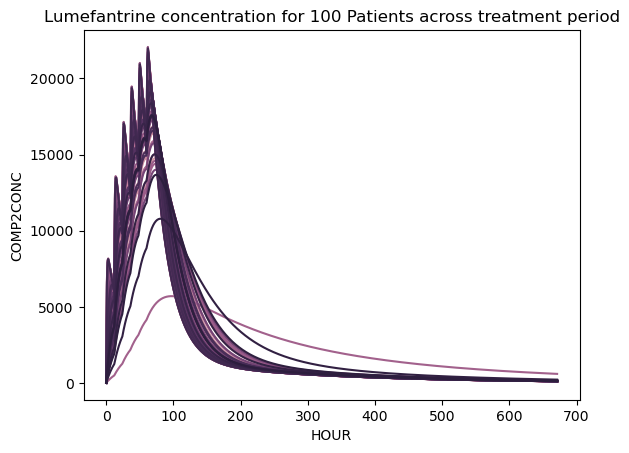

In [45]:
#Creating a spaghetti plot using seaborn
sns.lineplot(x='HOUR', y='COMP2CONC', hue='PID', data=df_100_patients, legend=False).set_title('Lumefantrine concentration for 100 Patients across treatment period')
plt.show()

In [47]:
df_100_patients_wide = df_100_patients.pivot(index="HOUR", columns="PID", values="COMP2CONC")
df_100_patients_wide
#lumefantrine conc model is stochastic

PID,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
HOUR,,,,,,,,,,,,,,,,,,,,,
0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1.0,1537.929,3670.912,3619.378,877.373,1166.860,1850.056,2703.509,342.428,1079.269,936.699,...,533.688,6352.994,1121.299,532.360,741.274,548.998,291.157,138.664,226.807,538.759
2.0,2751.591,5685.558,5626.787,1634.963,2136.416,3245.032,4482.129,658.708,1986.680,1739.266,...,1015.145,7911.424,2058.745,1012.698,1392.695,1043.320,561.759,269.917,439.243,1024.483
3.0,3699.577,6735.450,6685.935,2285.943,2936.400,4282.718,5622.035,950.351,2744.784,2423.281,...,1448.305,8126.325,2837.285,1444.925,1962.882,1487.167,812.907,394.074,638.005,1461.193
4.0,4430.196,7225.317,7189.134,2842.123,3590.815,5040.340,6321.874,1218.792,3373.311,3002.616,...,1836.834,7970.749,3478.635,1832.689,2459.689,1884.445,1045.649,511.440,823.763,1852.634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667.0,116.301,112.191,112.233,121.848,118.609,115.096,113.243,144.672,119.397,121.012,...,130.731,110.915,119.002,130.790,124.309,130.075,152.110,220.805,167.342,130.509
668.0,115.797,111.704,111.746,121.323,118.097,114.597,112.752,144.061,118.881,120.490,...,130.172,110.432,118.489,130.231,123.775,129.519,151.472,219.918,166.649,129.951
669.0,115.296,111.218,111.260,120.801,117.587,114.100,112.262,143.453,118.368,119.971,...,129.616,109.952,117.977,129.675,123.243,128.965,150.836,219.035,165.959,129.396


C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


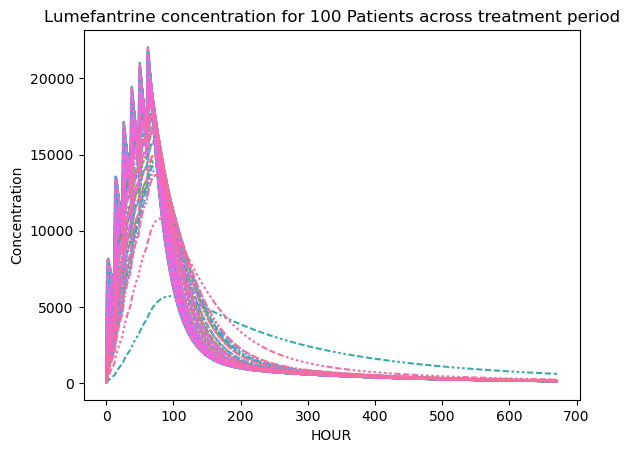

In [49]:
sns.lineplot(data=df_100_patients_wide,legend=False).set(title='Lumefantrine concentration for 100 Patients across treatment period',ylabel='Concentration')
plt.show()

C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


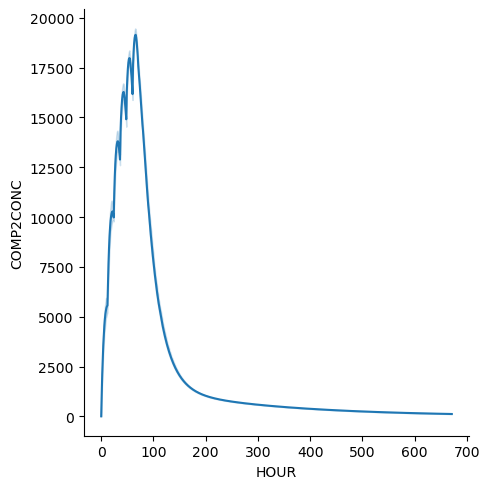

In [51]:
sns.relplot(x='HOUR', y='COMP2CONC', estimator='median', errorbar=('ci', 95), data=df_100_patients,kind="line")
plt.show()

# **Plotting the 25th, 75th and median concentration curves for 100 patients** <br>

### **Key function**: pandas.DataFrame.median <br>
### **Reference**: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html <br>
### **Usage**: 
`DataFrame.median()` <br>
1. **axis**: `{index (0), columns (1)}` <br>
    Axis for the function to be applied on. For Series this parameter is unused and defaults to 0. For DataFrames, specifying axis=None will apply the aggregation across both axes.

C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

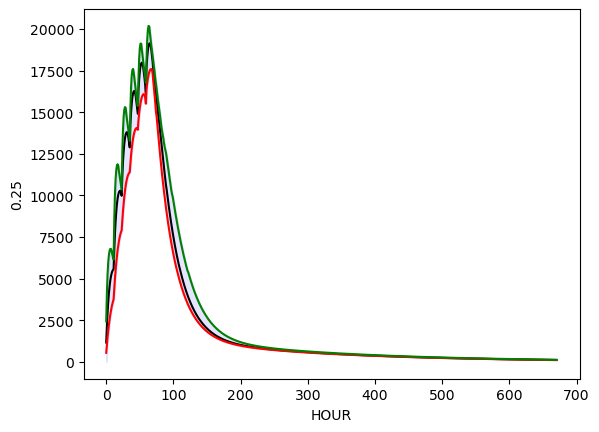

In [53]:
# Calculate the median, 25th percentile, and 75th percentile
median_comp2conc = df_100_patients_wide.median(axis=1)
perc_25_comp2conc = df_100_patients_wide.quantile(0.25,axis=1)
perc_75_comp2conc = df_100_patients_wide.quantile(0.75,axis=1)

plot = sns.lineplot(x=df_100_patients['HOUR'],y=median_comp2conc, color="black")
plot = sns.lineplot(x=df_100_patients['HOUR'],y=perc_25_comp2conc, color="red")
plot = sns.lineplot(x=df_100_patients['HOUR'],y=perc_75_comp2conc, color="green")

plt.fill_between(np.arange(672), perc_25_comp2conc, perc_75_comp2conc, color='blue', alpha=0.1)

Text(0.5, 1.0, 'Parasite Density as a function of Time for 100 Patients')

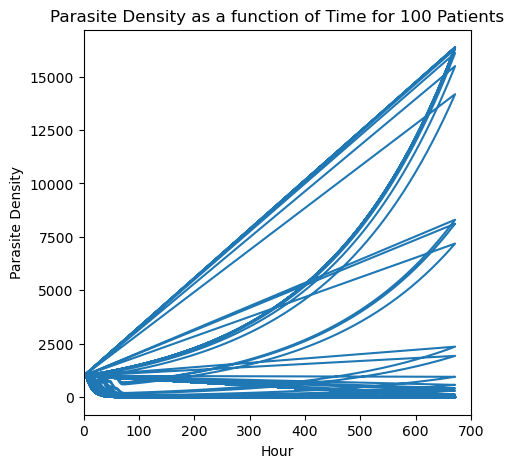

In [55]:
#Plotting Parasite Density as a function of Time for 100 patients
plt.figure(figsize=(5, 5))
plt.plot(df_100_patients['HOUR'],df_100_patients['PARASITEDENSITY'])
ax = plt.gca()
ax.set_xlim([0, 700])
#ax.set_ylim([0, 15000])
plt.xlabel('Hour')  # X-axis label
plt.ylabel('Parasite Density')  # Y-axis label
plt.title('Parasite Density as a function of Time for 100 Patients')  # Plot title

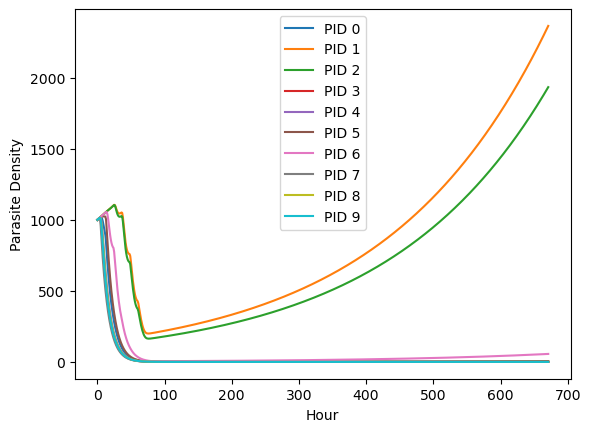

In [57]:
#Plotting Parasite Density as a function of Time for the first 10 patients i.e., PID 0-9
#To check the above plot
df_filtered = df_100_patients[df_100_patients['PID'].isin(range(10))]

for pid in df_filtered['PID'].unique():
    df_patient = df_filtered[df_filtered['PID'] == pid]
    plt.plot(df_patient['HOUR'], df_patient['PARASITEDENSITY'], label=f'PID {pid}')

plt.xlabel('Hour')  # X-axis label
plt.ylabel('Parasite Density')  # Y-axis label
plt.legend()  

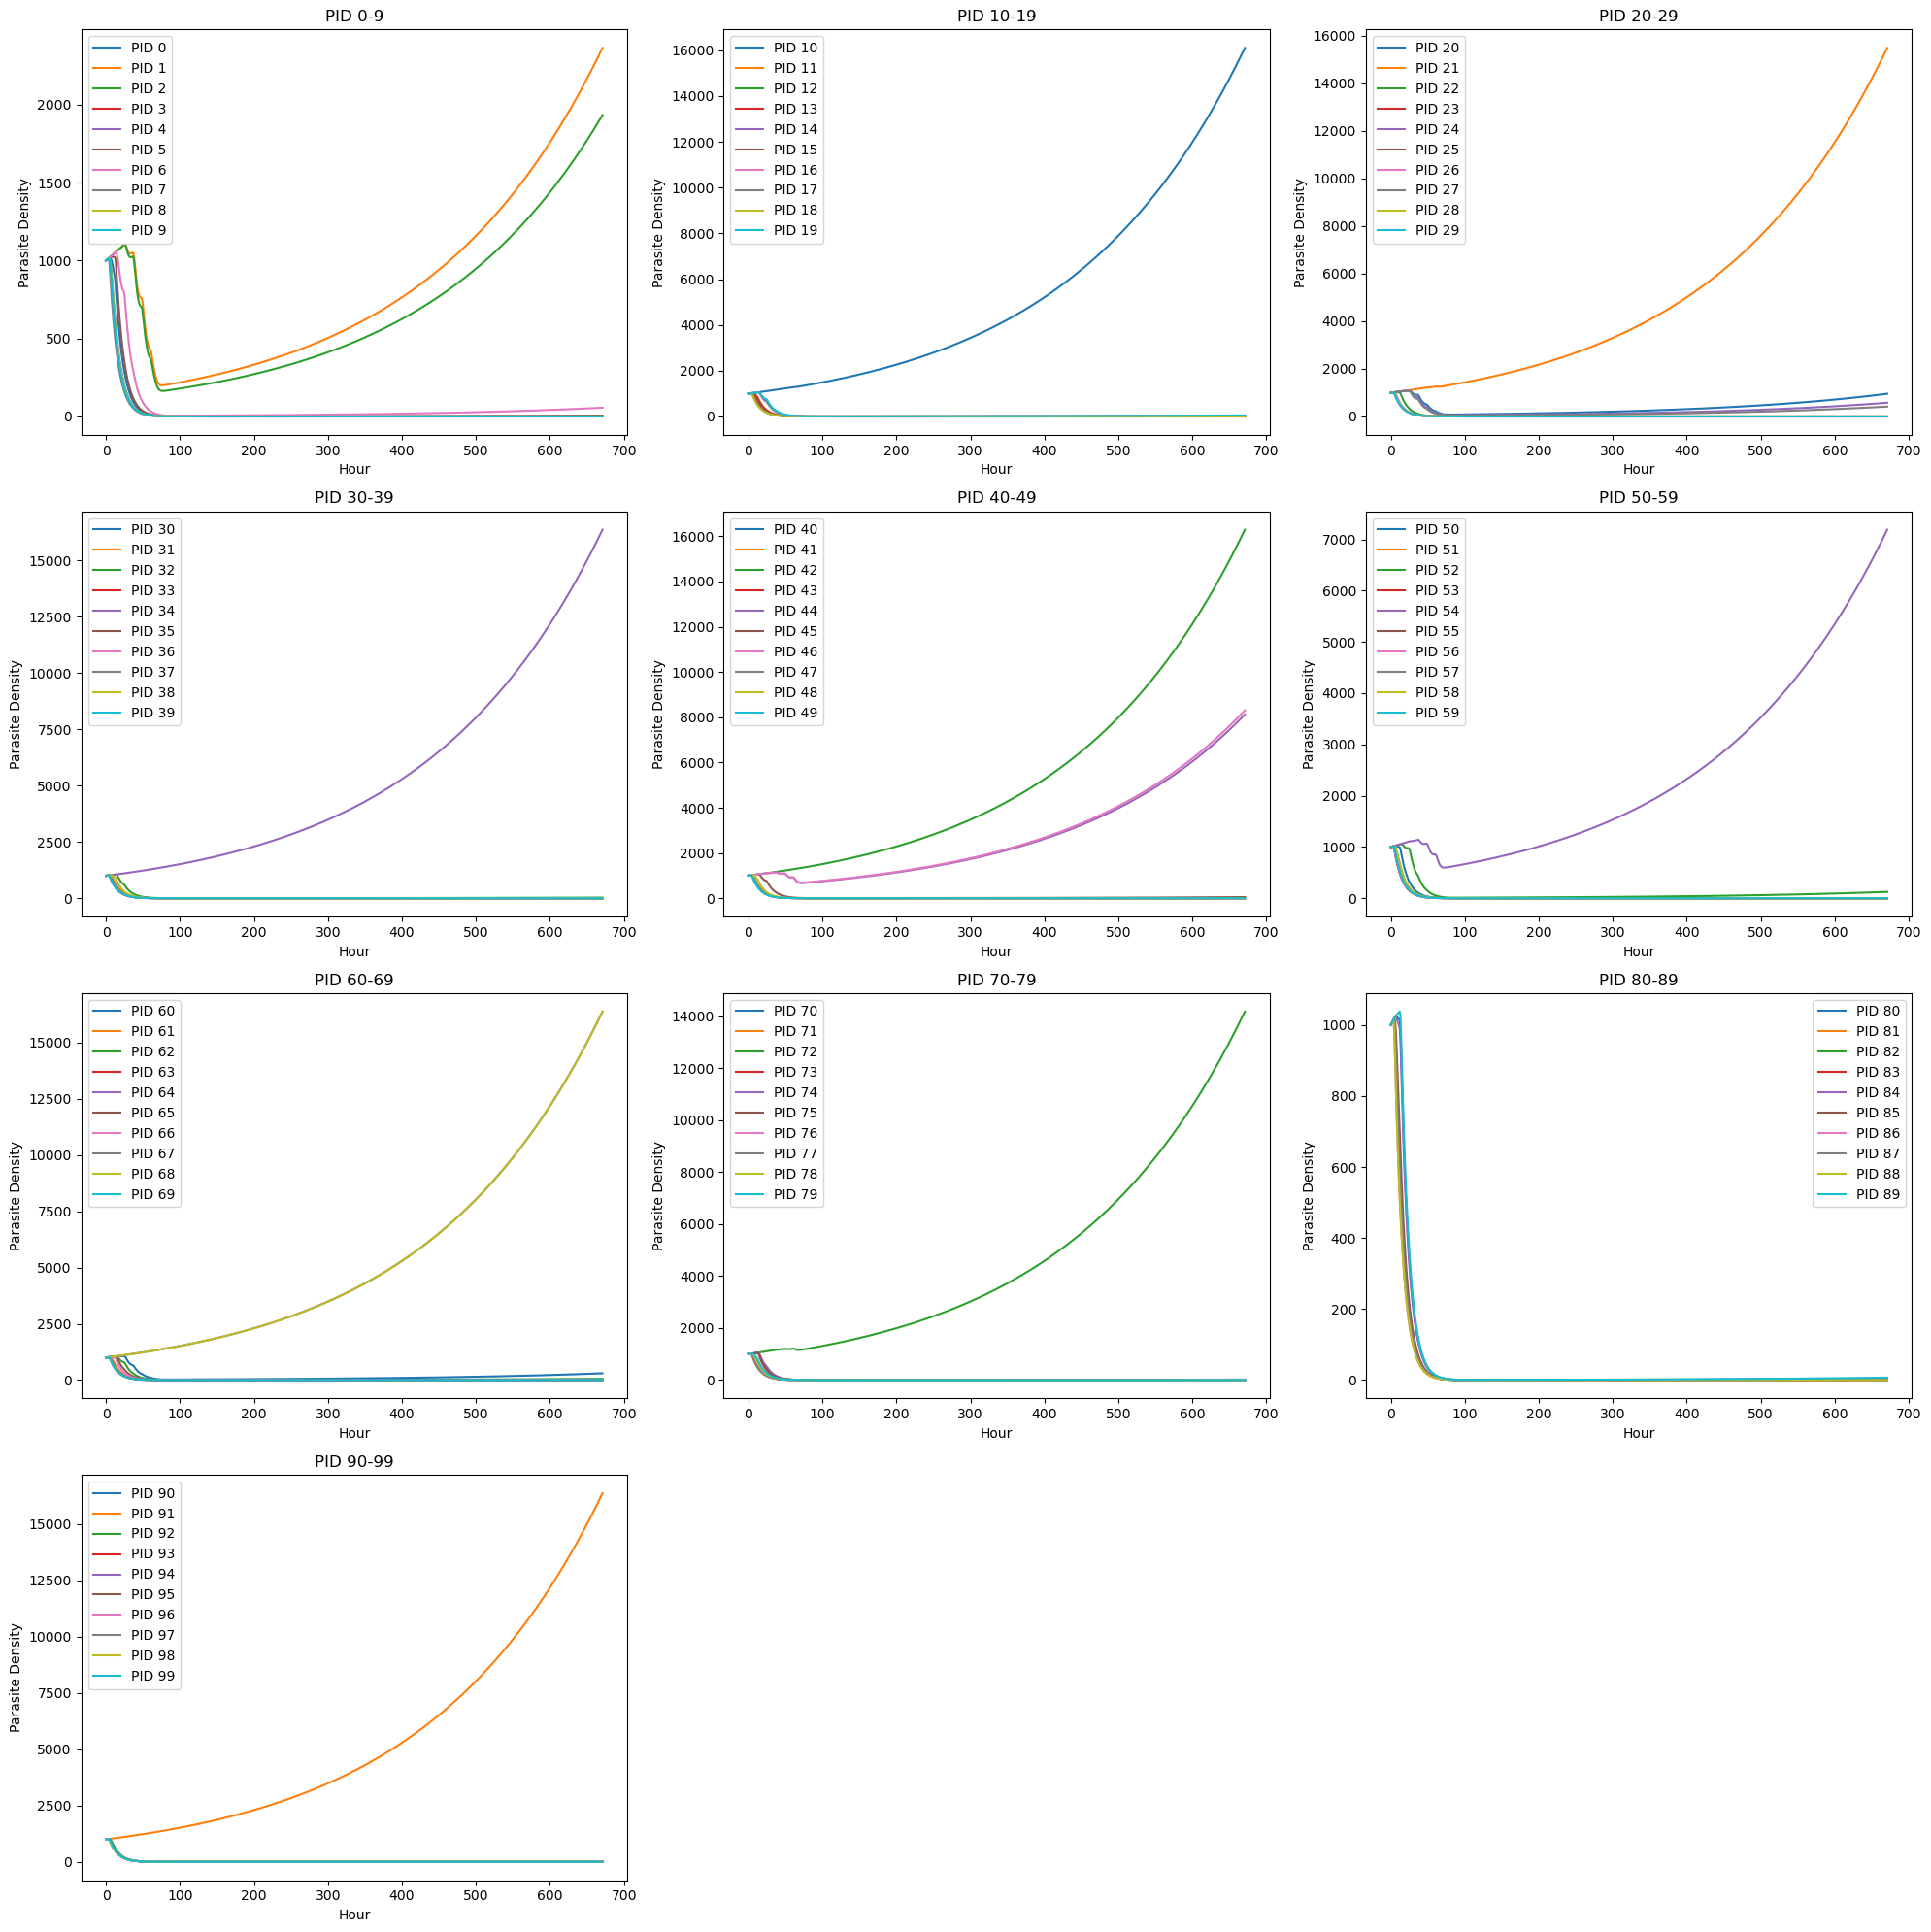

In [59]:
# Number of rows and columns for the subplot grid
nrows = 4
ncols = 3

# Create a new figure
plt.figure(figsize=(20, 20))

# Loop over each group of 10 patients
for i in range(10):
    # Calculate the PID range for this subplot
    pid_start = 10 * i
    pid_end = pid_start + 10

    # Filter DataFrame to include only patients with PID in the current range
    df_filtered = df_100_patients[df_100_patients['PID'].isin(range(pid_start, pid_end))]

    # Create a new subplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the data for each patient in the current PID range
    for pid in df_filtered['PID'].unique():
        df_patient = df_filtered[df_filtered['PID'] == pid]
        plt.plot(df_patient['HOUR'], df_patient['PARASITEDENSITY'], label=f'PID {pid}')

    # Set the title of the subplot to the current PID range
    plt.title(f'PID {pid_start}-{pid_end-1}')
    plt.legend()  # Add a legend
    # Add labels to the x and y axes of the figure
    plt.xlabel('Hour')  # X-axis label
    plt.ylabel('Parasite Density')  # Y-axis label

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


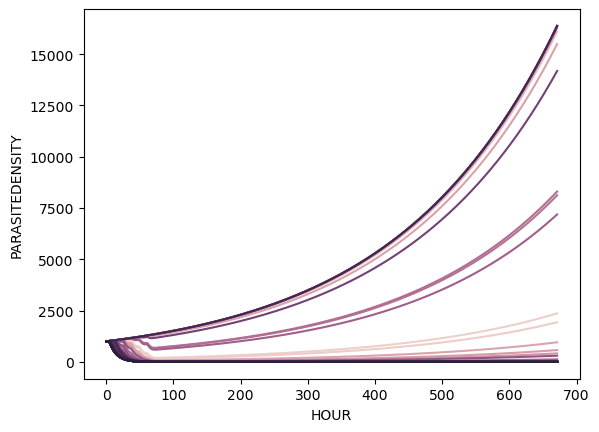

In [61]:
#Creating a spaghetti plot using seaborn
sns.lineplot(x='HOUR', y='PARASITEDENSITY', hue='PID', data=df_100_patients, legend=False)
plt.show()
#lum ng/ml or mg/mL

C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


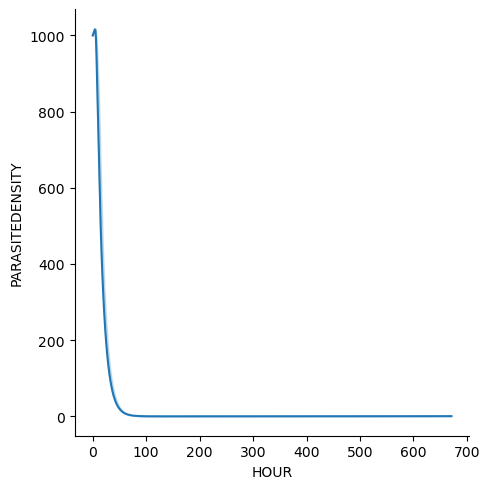

In [65]:
sns.relplot(x='HOUR', y='PARASITEDENSITY', estimator='median', errorbar=('ci', 95), data=df_100_patients,kind="line")
plt.show()

In [67]:
df_100_patients_wide_02 = df_100_patients.pivot(index="HOUR", columns="PID", values="PARASITEDENSITY")
df_100_patients_wide_02

PID,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
HOUR,,,,,,,,,,,,,,,,,,,,,
0.0,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,...,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
1.0,1004.175,1004.175,1004.175,1004.175,1004.175,1004.175,1004.175,1004.175,1004.175,1004.175,...,1004.175,1004.175,1004.175,1004.175,1004.175,1004.175,1004.175,1004.175,1004.175,1004.175
2.0,1008.368,1008.368,1008.368,1008.368,1008.368,1008.368,1008.368,1008.368,1008.368,1008.368,...,1008.368,1008.368,1008.368,1008.368,1008.368,1008.368,1008.368,1008.367,1008.368,1008.368
3.0,1012.569,1012.578,1012.578,1012.527,1012.554,1012.574,1012.578,1012.384,1012.548,1012.534,...,1012.457,1012.578,1012.551,1012.457,1012.506,1012.462,1012.359,1012.261,1012.322,1012.459
4.0,1016.595,1016.806,1016.806,1014.945,1016.078,1016.733,1016.802,1007.838,1015.835,1015.266,...,1011.507,1016.806,1015.960,1011.487,1013.956,1011.736,1006.574,1002.057,1004.808,1011.584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667.0,2.040,2326.314,1902.376,0.097,0.445,5.208,55.370,0.000,0.295,0.139,...,0.004,16104.976,0.360,0.004,0.036,0.005,0.000,0.000,0.000,0.004
668.0,2.048,2336.027,1910.319,0.098,0.447,5.230,55.601,0.000,0.296,0.140,...,0.004,16172.220,0.362,0.004,0.037,0.005,0.000,0.000,0.000,0.004
669.0,2.057,2345.781,1918.295,0.098,0.449,5.252,55.833,0.000,0.297,0.140,...,0.004,16239.745,0.363,0.004,0.037,0.005,0.000,0.000,0.000,0.004


C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

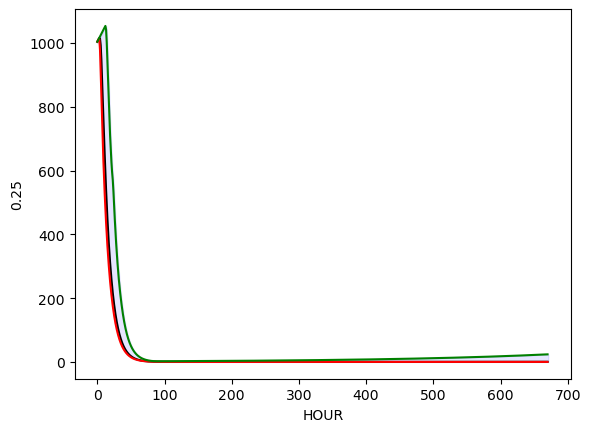

In [69]:
# Calculate the median, 25th percentile, and 75th percentile
median_parasite_density = df_100_patients_wide_02.median(axis=1)
perc_25_parasite_density = df_100_patients_wide_02.quantile(0.25,axis=1)
perc_75_parasite_density = df_100_patients_wide_02.quantile(0.75,axis=1)

plot = sns.lineplot(x=df_100_patients['HOUR'],y=median_parasite_density, color="black")
plot = sns.lineplot(x=df_100_patients['HOUR'],y=perc_25_parasite_density, color="red")
plot = sns.lineplot(x=df_100_patients['HOUR'],y=perc_75_parasite_density, color="green")

plt.fill_between(np.arange(672), perc_25_parasite_density, perc_75_parasite_density, color='blue', alpha=0.1)


In [71]:
df_100_patients.head()

,PID,HOUR,COMP2CONC,PARASITEDENSITY
1,0,0.0,0.000,1000.000
2,0,1.0,1537.929,1004.175
3,0,2.0,2751.591,1008.368
4,0,3.0,3699.577,1012.569
5,0,4.0,4430.196,1016.595


In [73]:
df_100_patients_wide.head()

PID,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
HOUR,,,,,,,,,,,,,,,,,,,,,
0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1.0,1537.929,3670.912,3619.378,877.373,1166.860,1850.056,2703.509,342.428,1079.269,936.699,...,533.688,6352.994,1121.299,532.360,741.274,548.998,291.157,138.664,226.807,538.759
2.0,2751.591,5685.558,5626.787,1634.963,2136.416,3245.032,4482.129,658.708,1986.680,1739.266,...,1015.145,7911.424,2058.745,1012.698,1392.695,1043.320,561.759,269.917,439.243,1024.483
3.0,3699.577,6735.450,6685.935,2285.943,2936.400,4282.718,5622.035,950.351,2744.784,2423.281,...,1448.305,8126.325,2837.285,1444.925,1962.882,1487.167,812.907,394.074,638.005,1461.193
4.0,4430.196,7225.317,7189.134,2842.123,3590.815,5040.340,6321.874,1218.792,3373.311,3002.616,...,1836.834,7970.749,3478.635,1832.689,2459.689,1884.445,1045.649,511.440,823.763,1852.634


In [75]:
df_100_patients_wide_02.head()

PID,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
HOUR,,,,,,,,,,,,,,,,,,,,,
0.0,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,...,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
1.0,1004.175,1004.175,1004.175,1004.175,1004.175,1004.175,1004.175,1004.175,1004.175,1004.175,...,1004.175,1004.175,1004.175,1004.175,1004.175,1004.175,1004.175,1004.175,1004.175,1004.175
2.0,1008.368,1008.368,1008.368,1008.368,1008.368,1008.368,1008.368,1008.368,1008.368,1008.368,...,1008.368,1008.368,1008.368,1008.368,1008.368,1008.368,1008.368,1008.367,1008.368,1008.368
3.0,1012.569,1012.578,1012.578,1012.527,1012.554,1012.574,1012.578,1012.384,1012.548,1012.534,...,1012.457,1012.578,1012.551,1012.457,1012.506,1012.462,1012.359,1012.261,1012.322,1012.459
4.0,1016.595,1016.806,1016.806,1014.945,1016.078,1016.733,1016.802,1007.838,1015.835,1015.266,...,1011.507,1016.806,1015.960,1011.487,1013.956,1011.736,1006.574,1002.057,1004.808,1011.584


In [77]:
df_100_patients_wide_02.tail()

PID,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
HOUR,,,,,,,,,,,,,,,,,,,,,
667.0,2.040,2326.314,1902.376,0.097,0.445,5.208,55.370,0.0,0.295,0.139,...,0.004,16104.976,0.360,0.004,0.036,0.005,0.0,0.0,0.0,0.004
668.0,2.048,2336.027,1910.319,0.098,0.447,5.230,55.601,0.0,0.296,0.140,...,0.004,16172.220,0.362,0.004,0.037,0.005,0.0,0.0,0.0,0.004
669.0,2.057,2345.781,1918.295,0.098,0.449,5.252,55.833,0.0,0.297,0.140,...,0.004,16239.745,0.363,0.004,0.037,0.005,0.0,0.0,0.0,0.004
670.0,2.065,2355.575,1926.305,0.098,0.450,5.274,56.067,0.0,0.299,0.141,...,0.004,16307.552,0.365,0.004,0.037,0.005,0.0,0.0,0.0,0.004
671.0,2.074,2365.411,1934.348,0.099,0.452,5.296,56.301,0.0,0.300,0.141,...,0.004,16375.642,0.366,0.004,0.037,0.005,0.0,0.0,0.0,0.004


In [79]:
#Plotting parasite density at days 14 (hour 336) and ~28 (hour 671)
#df_100_patients_wide_02 contains parasite density for each patient seperated by hour

#Getting the parasite densities at the respective times and merging them by PID
df_100_patients_day14 = df_100_patients_wide_02.loc[336.0]
df_100_patients_day28 = df_100_patients_wide_02.loc[671.0]

df_100_patients_day14 = df_100_patients_day14.to_frame()
df_100_patients_day28 = df_100_patients_day28.to_frame()

# Merge the DataFrames on the index 'PID'
df_100_patients_days_14_28_merged = pd.merge(df_100_patients_day14, df_100_patients_day28, on='PID')
df_100_patients_days_14_28_merged = df_100_patients_days_14_28_merged.rename(columns={336.0:'day14', 671.0:'day28'})

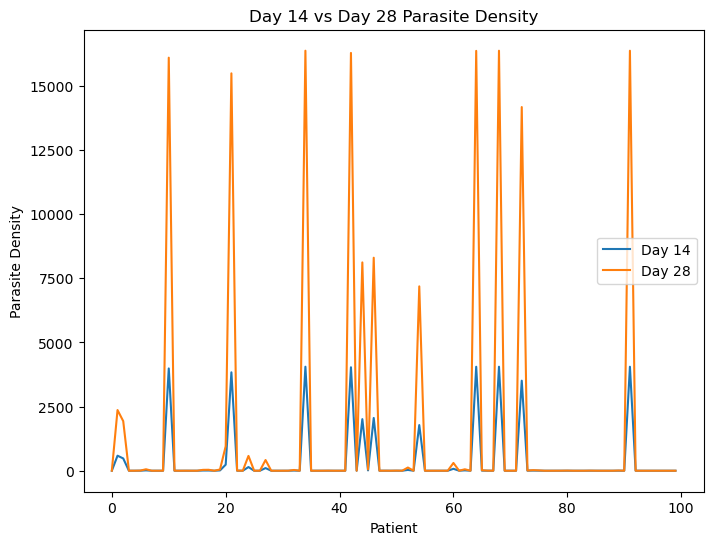

In [81]:
plt.figure(figsize=(8, 6))
plt.plot(df_100_patients_days_14_28_merged['day14'], label='Day 14')
plt.plot(df_100_patients_days_14_28_merged['day28'], label='Day 28')
plt.title('Day 14 vs Day 28 Parasite Density')
plt.xlabel('Patient')
plt.ylabel('Parasite Density')
plt.legend()
plt.show()

In [83]:
# Create an empty dictionary to store the data frames
dfs = {}

# Run the command 5 times in a loop and store the results in different data frames
for i in range(1, 6):
    command_100_patients = "C:/Users/tus88262/Documents/GitHub/2019-test-ppq-pk/build/Debug/run_ppq_pk.exe --lum --pmf 0.2 -n 100"
    output_100_patients = subprocess.run(command_100_patients, capture_output=True, text=True)
    lines_100_patients = output_100_patients.stdout.splitlines()
    df_100_patients = pd.DataFrame([line.split(',') for line in lines_100_patients], columns=["PID","HOUR","COMP2CONC","PARASITEDENSITY"])
    df_100_patients = df_100_patients.iloc[1:]
    df_100_patients = df_100_patients.apply(pd.to_numeric, errors='coerce')
    dfs[f'df_{i}'] = df_100_patients

# Access the data frames using the labels df_1, df_2, ..., df_5
df_1 = dfs['df_1']
df_2 = dfs['df_2']
df_3 = dfs['df_3']
df_4 = dfs['df_4']
df_5 = dfs['df_5']

In [84]:
# Create an empty dictionary to store the wide-format DataFrames
wide_dfs = {}

for i in range(1, 6):
    # Assuming df_100_patients is defined
    wide_dfs[f'df_{i}_wide'] = globals()[f'df_{i}'].pivot(index="HOUR", columns="PID", values="PARASITEDENSITY")

# Extracting individual DataFrames from the dictionary
df_1_wide = wide_dfs['df_1_wide']
df_2_wide = wide_dfs['df_2_wide']
df_3_wide = wide_dfs['df_3_wide']
df_4_wide = wide_dfs['df_4_wide']
df_5_wide = wide_dfs['df_5_wide']

In [91]:
# Create empty dictionaries to store the data frames
dfs_day14 = {}
dfs_day28 = {}
dfs_merged = {}

# Process the wide-format DataFrames in a loop and store the results in different dictionaries
for i in range(1, 6):
    df_wide = globals()[f"df_{i}_wide"]  # Access the wide-format DataFrame
    df_100_patients_day14 = df_wide.loc[336.0]
    df_100_patients_day28 = df_wide.loc[671.0]

    # Merge the DataFrames on the index 'PID'
    df_100_patients_days_14_28_merged = pd.merge(df_100_patients_day14, df_100_patients_day28, on='PID')
    df_100_patients_days_14_28_merged = df_100_patients_days_14_28_merged.rename(columns={336.0:'day14', 671.0:'day28'})

    # Store the results in different dictionaries
    dfs_day14[f'df_{i}'] = df_100_patients_day14
    dfs_day28[f'df_{i}'] = df_100_patients_day28
    dfs_merged[f'df_{i}'] = df_100_patients_days_14_28_merged

df_1_merged = dfs_merged['df_1']
df_2_merged = dfs_merged['df_2']
df_3_merged = dfs_merged['df_3']
df_4_merged = dfs_merged['df_4']
df_5_merged = dfs_merged['df_5']

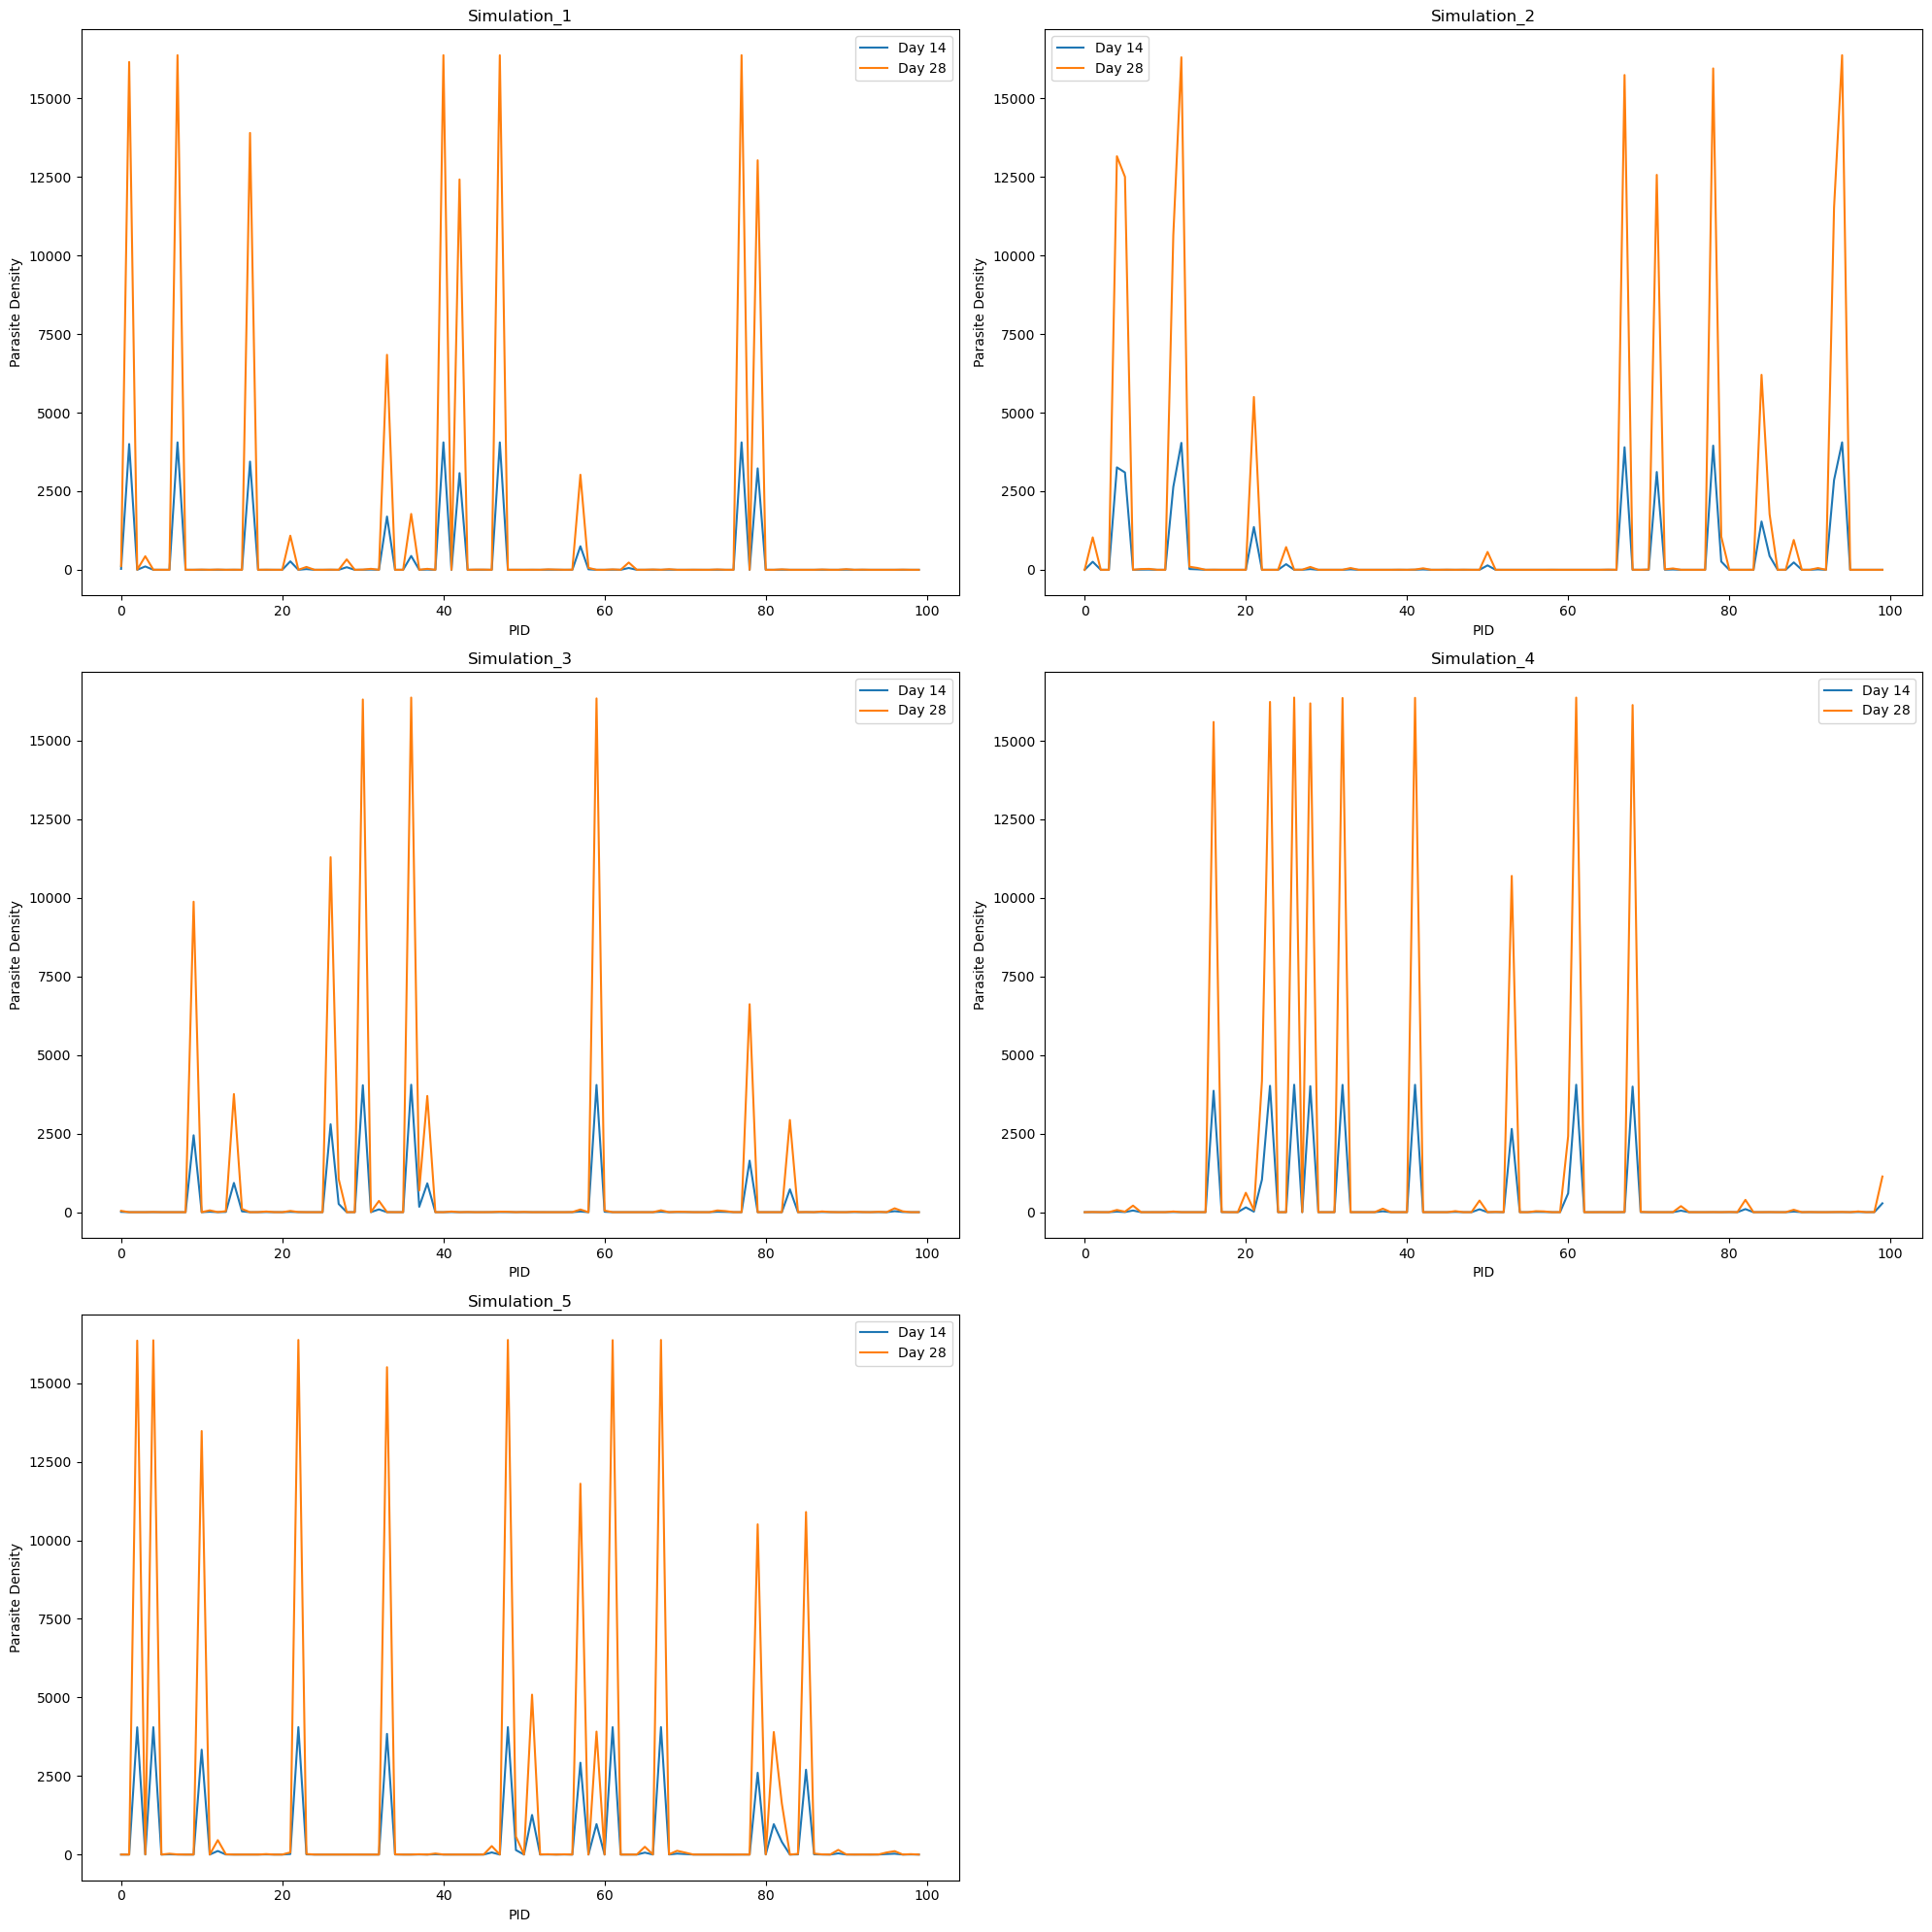

In [103]:
# Number of rows and columns for the subplot grid
nrows = 3
ncols = 2

# Create a new figure
plt.figure(figsize=(20, 20))

plt.subplot(nrows, ncols, 1)
plt.plot(df_1_merged['day14'], label='Day 14')
plt.plot(df_1_merged['day28'], label='Day 28')
plt.title('Day 14 vs Day 28 Parasite Density')

# Set the title of the subplot to the current PID range
plt.title('Simulation_1')
plt.legend()  # Add a legend
# Add labels to the x and y axes of the figure
plt.xlabel('PID')  # X-axis label
plt.ylabel('Parasite Density')  # Y-axis label

plt.subplot(nrows, ncols, 2)
plt.plot(df_2_merged['day14'], label='Day 14')
plt.plot(df_2_merged['day28'], label='Day 28')
plt.title('Day 14 vs Day 28 Parasite Density')

# Set the title of the subplot to the current PID range
plt.title('Simulation_2')
plt.legend()  # Add a legend
# Add labels to the x and y axes of the figure
plt.xlabel('PID')  # X-axis label
plt.ylabel('Parasite Density')  # Y-axis label

plt.subplot(nrows, ncols, 3)
plt.plot(df_3_merged['day14'], label='Day 14')
plt.plot(df_3_merged['day28'], label='Day 28')
plt.title('Day 14 vs Day 28 Parasite Density')

# Set the title of the subplot to the current PID range
plt.title('Simulation_3')
plt.legend()  # Add a legend
# Add labels to the x and y axes of the figure
plt.xlabel('PID')  # X-axis label
plt.ylabel('Parasite Density')  # Y-axis label

plt.subplot(nrows, ncols, 4)
plt.plot(df_4_merged['day14'], label='Day 14')
plt.plot(df_4_merged['day28'], label='Day 28')
plt.title('Day 14 vs Day 28 Parasite Density')

# Set the title of the subplot to the current PID range
plt.title('Simulation_4')
plt.legend()  # Add a legend
# Add labels to the x and y axes of the figure
plt.xlabel('PID')  # X-axis label
plt.ylabel('Parasite Density')  # Y-axis label

plt.subplot(nrows, ncols, 5)
plt.plot(df_5_merged['day14'], label='Day 14')
plt.plot(df_5_merged['day28'], label='Day 28')
plt.title('Day 14 vs Day 28 Parasite Density')

# Set the title of the subplot to the current PID range
plt.title('Simulation_5')
plt.legend()  # Add a legend
# Add labels to the x and y axes of the figure
plt.xlabel('PID')  # X-axis label
plt.ylabel('Parasite Density')  # Y-axis label

#Save plot
plt.savefig('lum_day_14_28_pd_sim5.png')

# Show the plot
plt.tight_layout()
plt.show()

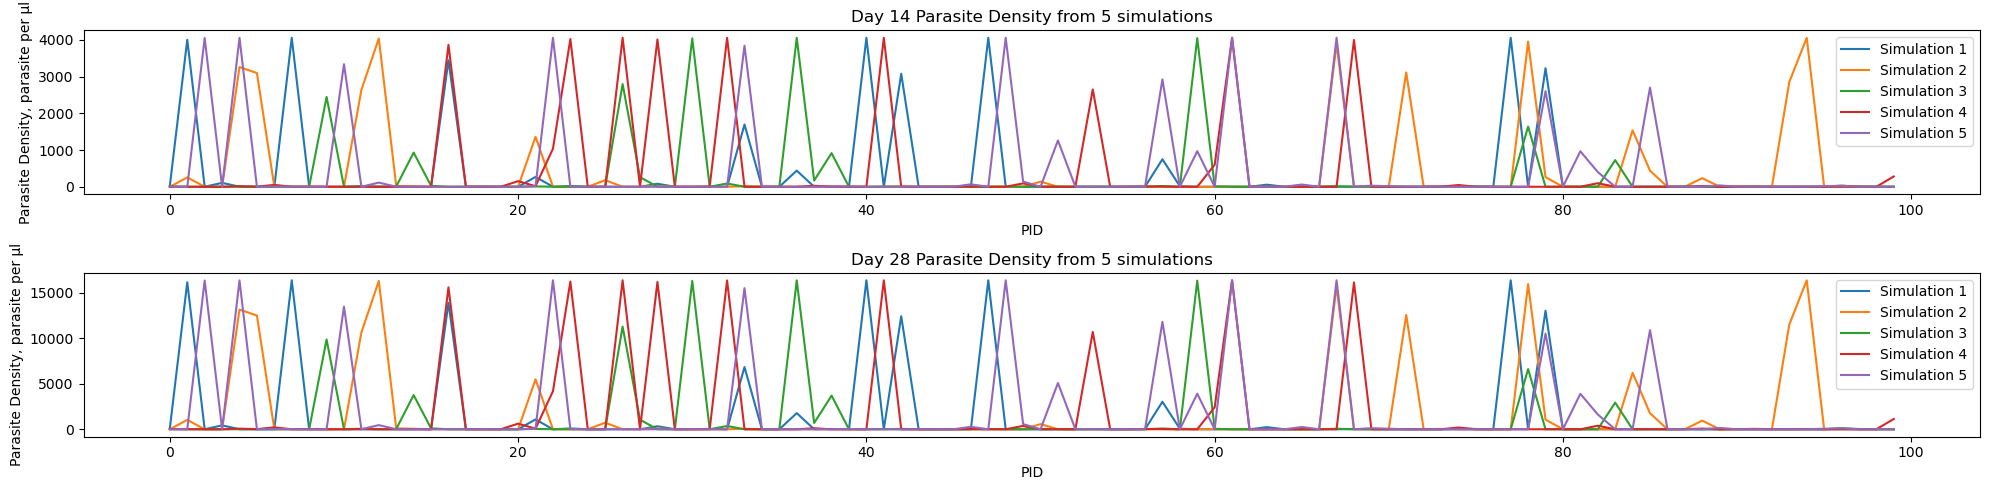

In [111]:
# Number of rows and columns for the subplot grid
nrows = 2
ncols = 1

# Create a new figure
plt.figure(figsize=(20, 5))

#Create first subplot
plt.subplot(nrows, ncols, 1)
plt.plot(df_1_merged['day14'], label='Simulation 1')
plt.plot(df_2_merged['day14'], label='Simulation 2')
plt.plot(df_3_merged['day14'], label='Simulation 3')
plt.plot(df_4_merged['day14'], label='Simulation 4')
plt.plot(df_5_merged['day14'], label='Simulation 5')

# Set the title of the subplot 
plt.title('Day 14 Parasite Density from 5 simulations')
plt.legend()  # Add a legend
# Add labels to the x and y axes of the figure
plt.xlabel('PID')  # X-axis label
plt.ylabel('Parasite Density, parasite per µl')  # Y-axis label

plt.subplot(nrows, ncols, 2)
plt.plot(df_1_merged['day28'], label='Simulation 1')
plt.plot(df_2_merged['day28'], label='Simulation 2')
plt.plot(df_3_merged['day28'], label='Simulation 3')
plt.plot(df_4_merged['day28'], label='Simulation 4')
plt.plot(df_5_merged['day28'], label='Simulation 5')

# Set the title of the subplot 
plt.title('Day 28 Parasite Density from 5 simulations')
plt.legend()  # Add a legend
# Add labels to the x and y axes of the figure
plt.xlabel('PID')  # X-axis label
plt.ylabel('Parasite Density, parasite per µl')  # Y-axis label

#Save plot
plt.savefig('lum_day_14_28_pd_sim5_merged.png')

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

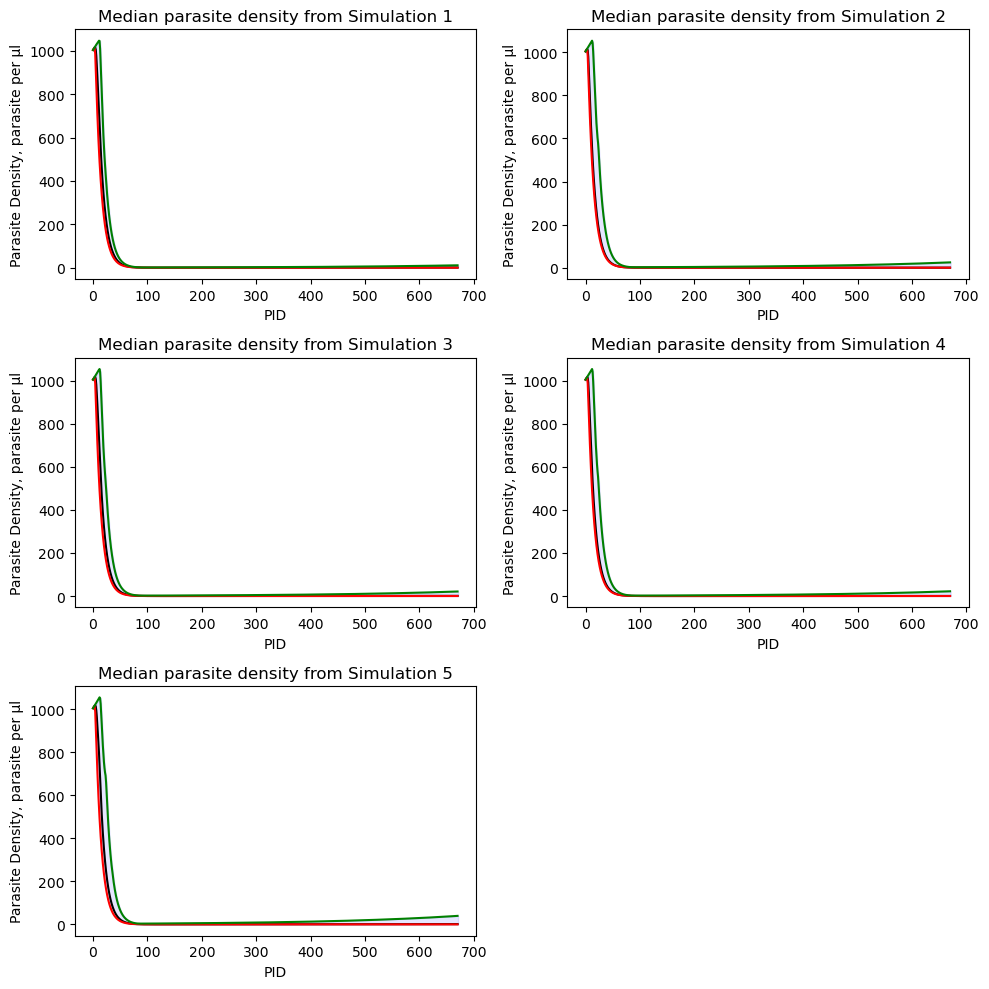

In [179]:
# Number of rows and columns for the subplot grid
nrows = 3
ncols = 2

# Create a new figure
plt.figure(figsize=(10, 10))

#Create first subplot
plt.subplot(nrows, ncols, 1)
# Calculate the median
median_df1 = df_1_wide.median(axis=1)
df1_25 = df_1_wide.quantile(0.25,axis=1)
df1_75 = df_1_wide.quantile(0.75,axis=1)
#plt.plot(x=df_1['HOUR'],y=median_df1, label='Simulation 1')
sns.lineplot(x=df_1['HOUR'],y=median_df1, color="black")
sns.lineplot(x=df_1['HOUR'],y=df1_25, color="red")
sns.lineplot(x=df_1['HOUR'],y=df1_75, color="green")
plt.fill_between(np.arange(672), df1_25, df1_75 , color='blue', alpha=0.1)
# Set the title of the subplot 
plt.title('Median parasite density from Simulation 1')
# Add labels to the x and y axes of the figure
plt.xlabel('PID')  # X-axis label
plt.ylabel('Parasite Density, parasite per µl')  # Y-axis label


#Create second subplot
plt.subplot(nrows, ncols, 2)
# Calculate the median
median_df2 = df_2_wide.median(axis=1)
df2_25 = df_2_wide.quantile(0.25,axis=1)
df2_75 = df_2_wide.quantile(0.75,axis=1)
#plt.plot(x=df_1['HOUR'],y=median_df1, label='Simulation 1')
sns.lineplot(x=df_2['HOUR'],y=median_df2, color="black")
sns.lineplot(x=df_2['HOUR'],y=df2_25, color="red")
sns.lineplot(x=df_2['HOUR'],y=df2_75, color="green")
plt.fill_between(np.arange(672), df2_25, df2_75 , color='blue', alpha=0.1)
#plt.plot(x=df_2['HOUR'],y=median_df2, label='Simulation 2')

# Set the title of the subplot 
plt.title('Median parasite density from Simulation 2')
# Add labels to the x and y axes of the figure
plt.xlabel('PID')  # X-axis label
plt.ylabel('Parasite Density, parasite per µl')  # Y-axis label

#Create third subplot
plt.subplot(nrows, ncols, 3)
# Calculate the median
median_df3 = df_3_wide.median(axis=1)
df3_25 = df_3_wide.quantile(0.25,axis=1)
df3_75 = df_3_wide.quantile(0.75,axis=1)
#plt.plot(x=df_3['HOUR'],y=median_df3, label='Simulation 3')
sns.lineplot(x=df_3['HOUR'],y=median_df3, color="black")
sns.lineplot(x=df_3['HOUR'],y=df3_25, color="red")
sns.lineplot(x=df_3['HOUR'],y=df3_75, color="green")
plt.fill_between(np.arange(672), df3_25, df3_75 , color='blue', alpha=0.1)
# Set the title of the subplot 
plt.title('Median parasite density from Simulation 3')
# Add labels to the x and y axes of the figure
plt.xlabel('PID')  # X-axis label
plt.ylabel('Parasite Density, parasite per µl')  # Y-axis label

#Create fourth subplot
plt.subplot(nrows, ncols, 4)
# Calculate the median
median_df4 = df_4_wide.median(axis=1)
df4_25 = df_4_wide.quantile(0.25,axis=1)
df4_75 = df_4_wide.quantile(0.75,axis=1)
#plt.plot(x=df_4['HOUR'],y=median_df4, label='Simulation 4')
sns.lineplot(x=df_4['HOUR'],y=median_df4,color="black")
sns.lineplot(x=df_4['HOUR'],y=df4_25, color="red")
sns.lineplot(x=df_4['HOUR'],y=df4_75, color="green")
plt.fill_between(np.arange(672), df4_25, df4_75 , color='blue', alpha=0.1)
# Set the title of the subplot 
plt.title('Median parasite density from Simulation 4')
# Add labels to the x and y axes of the figure
plt.xlabel('PID')  # X-axis label
plt.ylabel('Parasite Density, parasite per µl')  # Y-axis label

#Create first subplot
plt.subplot(nrows, ncols, 5)
# Calculate the median
median_df5 = df_5_wide.median(axis=1)
df5_25 = df_5_wide.quantile(0.25,axis=1)
df5_75 = df_5_wide.quantile(0.75,axis=1)
#plt.plot(x=df_5['HOUR'],y=median_df5, label='Simulation 5')
sns.lineplot(x=df_5['HOUR'],y=median_df5,color="black")
sns.lineplot(x=df_5['HOUR'],y=df5_25, color="red")
sns.lineplot(x=df_5['HOUR'],y=df5_75, color="green")
plt.fill_between(np.arange(672), df5_25, df5_75 , color='blue', alpha=0.1)
# Set the title of the subplot 
plt.title('Median parasite density from Simulation 5')
# Add labels to the x and y axes of the figure
plt.xlabel('PID')  # X-axis label
plt.ylabel('Parasite Density, parasite per µl')  # Y-axis label

#Save plot
plt.savefig('lum_median_pd_sim5_merged.png')

# Show the plot
plt.tight_layout()
plt.show()

In [243]:
df_1['SIMULATION'] = 1
df_2['SIMULATION'] = 2
df_3['SIMULATION'] = 3
df_4['SIMULATION'] = 4
df_5['SIMULATION'] = 5

In [323]:
concatenated_df = pd.concat([df_1, df_2, df_3, df_4, df_5])
subset_df = concatenated_df[concatenated_df['HOUR'].isin([168,336,504,671])]
#subset_df['HOUR'] = subset_df['HOUR'].replace({168: 'Day 7', 336: 'Day 14', 504: 'Day 21', 671: 'Day 28'})
subset_df = subset_df.copy()
subset_df['HOUR'] = subset_df['HOUR'].astype(str)
subset_df.loc[subset_df['HOUR'] == '168.0', 'HOUR'] = 'Day 7'
subset_df.loc[subset_df['HOUR'] == '336.0', 'HOUR'] = 'Day 14'
subset_df.loc[subset_df['HOUR'] == '504.0', 'HOUR'] = 'Day 21'
subset_df.loc[subset_df['HOUR'] == '671.0', 'HOUR'] = 'Day 28'
subset_df = subset_df.rename(columns={'HOUR': 'DAY'})
df = pd.DataFrame(subset_df)

C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


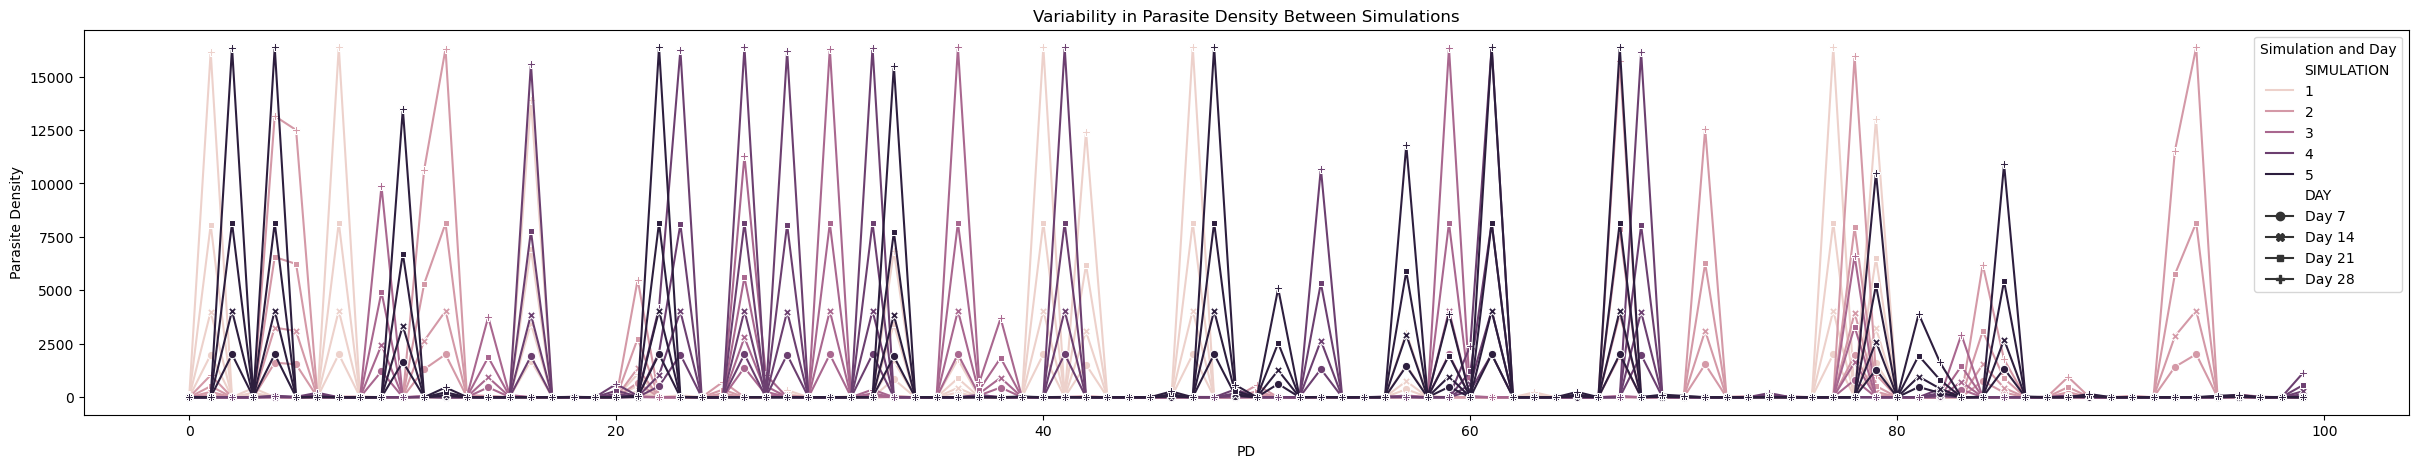

In [333]:
plt.figure(figsize=(30, 5))
sns.lineplot(data=df, x='PID', y='PARASITEDENSITY', hue='SIMULATION', style = "DAY", markers=True, dashes=False)
plt.title('Variability in Parasite Density Between Simulations')
plt.xlabel('PD')
plt.ylabel('Parasite Density')
plt.legend(title='Simulation and Day')
#Save plot
plt.savefig('lum_pd_days_07.14.21.28_sim5_merged.png')
plt.show()

C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

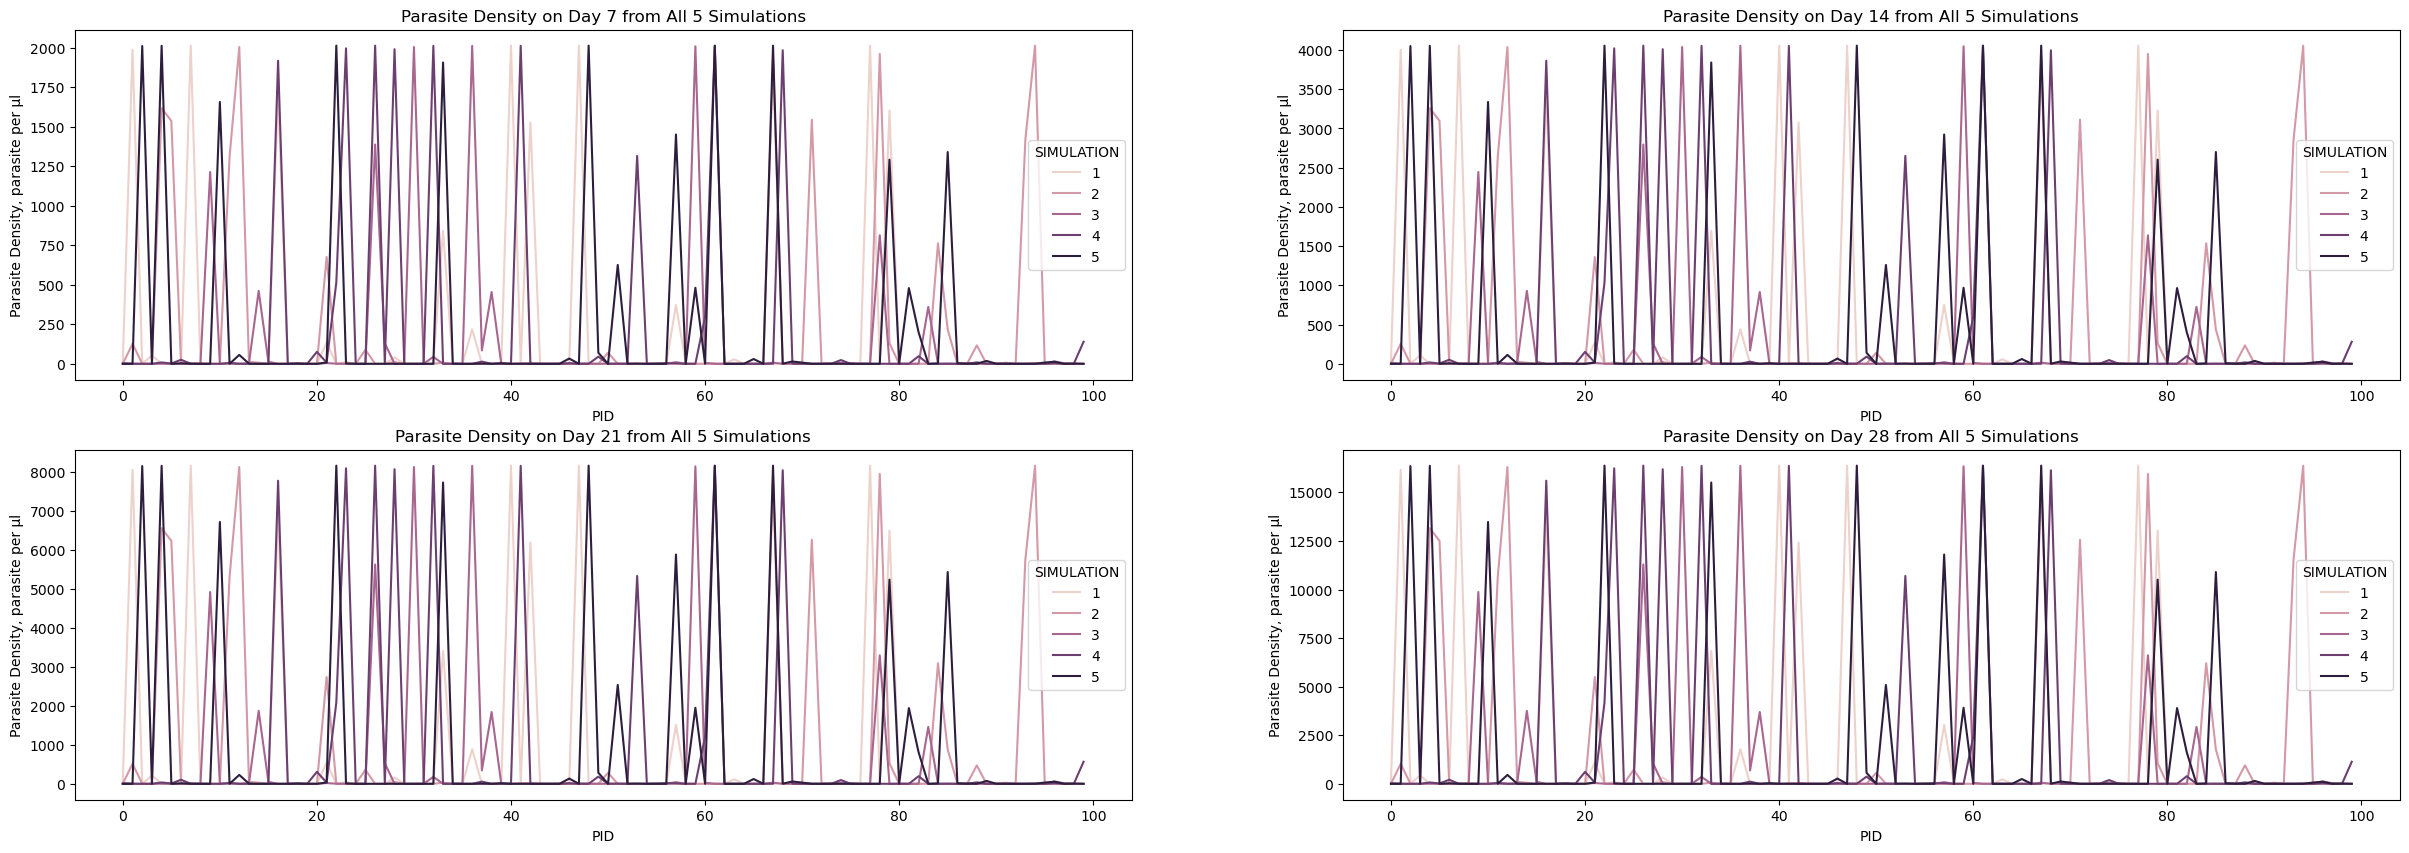

In [355]:
# Number of rows and columns for the subplot grid
nrows = 2
ncols = 2

# Create a new figure
plt.figure(figsize=(30,10))

concatenated_df_new = pd.concat([df_1, df_2, df_3, df_4, df_5])

#Create first subplot
plt.subplot(nrows, ncols, 1)
subset_df_01 = concatenated_df_new[concatenated_df_new['HOUR'].isin([168])]
subset_df_01 = subset_df_01.copy()
subset_df_01['HOUR'] = subset_df_01['HOUR'].astype(str)
subset_df_01.loc[subset_df_01['HOUR'] == '168.0', 'HOUR'] = 'Day 7'
subset_df_01 = subset_df_01.rename(columns={'HOUR': 'DAY'})
subset_df_01 = pd.DataFrame(subset_df_01)
sns.lineplot(data=subset_df_01, x='PID', y='PARASITEDENSITY', hue='SIMULATION', markers=True, dashes=False)
plt.title('Parasite Density on Day 7 from All 5 Simulations')
# Add labels to the x and y axes of the figure
plt.xlabel('PID')  # X-axis label
plt.ylabel('Parasite Density, parasite per µl')  # Y-axis label

plt.subplot(nrows, ncols, 2)
subset_df_02 = concatenated_df_new[concatenated_df_new['HOUR'].isin([336])]
subset_df_02 = subset_df_02.copy()
subset_df_02['HOUR'] = subset_df_02['HOUR'].astype(str)
subset_df_02.loc[subset_df_02['HOUR'] == '336.0', 'HOUR'] = 'Day 14'
subset_df_02 = subset_df_02.rename(columns={'HOUR': 'DAY'})
subset_df_02 = pd.DataFrame(subset_df_02)
sns.lineplot(data=subset_df_02, x='PID', y='PARASITEDENSITY', hue='SIMULATION', markers=True, dashes=False)
plt.title('Parasite Density on Day 14 from All 5 Simulations')
# Add labels to the x and y axes of the figure
plt.xlabel('PID')  # X-axis label
plt.ylabel('Parasite Density, parasite per µl')  # Y-axis label

plt.subplot(nrows, ncols, 3)
subset_df_03 = concatenated_df_new[concatenated_df_new['HOUR'].isin([504])]
subset_df_03 = subset_df_03.copy()
subset_df_03['HOUR'] = subset_df_03['HOUR'].astype(str)
subset_df_03.loc[subset_df_03['HOUR'] == '504.0', 'HOUR'] = 'Day 21'
subset_df_03 = subset_df_03.rename(columns={'HOUR': 'DAY'})
subset_df_03 = pd.DataFrame(subset_df_03)
sns.lineplot(data=subset_df_03, x='PID', y='PARASITEDENSITY', hue='SIMULATION', markers=True, dashes=False)
plt.title('Parasite Density on Day 21 from All 5 Simulations')
# Add labels to the x and y axes of the figure
plt.xlabel('PID')  # X-axis label
plt.ylabel('Parasite Density, parasite per µl')  # Y-axis label

plt.subplot(nrows, ncols, 4)
subset_df_04 = concatenated_df_new[concatenated_df_new['HOUR'].isin([671])]
subset_df_04 = subset_df_04.copy()
subset_df_04['HOUR'] = subset_df_04['HOUR'].astype(str)
subset_df_04.loc[subset_df_04['HOUR'] == '671.0', 'HOUR'] = 'Day 28'
subset_df_04 = subset_df_04.rename(columns={'HOUR': 'DAY'})
subset_df_04 = pd.DataFrame(subset_df_04)
sns.lineplot(data=subset_df_04, x='PID', y='PARASITEDENSITY', hue='SIMULATION', markers=True, dashes=False)
plt.title('Parasite Density on Day 28 from All 5 Simulations')
# Add labels to the x and y axes of the figure
plt.xlabel('PID')  # X-axis label
plt.ylabel('Parasite Density, parasite per µl')  # Y-axis label

#Save plot
plt.savefig('lum_pd_days_07.14.21.28_sim5_merged_subplot.png')
plt.show()

In [443]:
# Running model for 100 patients
command_1000_patients = "C:/Users/tus88262/Documents/GitHub/2019-test-ppq-pk/build/Debug/run_ppq_pk.exe --lum --pmf 0.4 -n 1000"
output_1000_patients = subprocess.run(command_1000_patients, capture_output=True, text=True)
lines_1000_patients = output_1000_patients.stdout.splitlines()
df_1000_patients = pd.DataFrame([line.split(',') for line in lines_1000_patients], columns=["PID","HOUR","COMP2CONC","PARASITEDENSITY"])
df_1000_patients = df_1000_patients.iloc[1:]
df_1000_patients = df_1000_patients.apply(pd.to_numeric, errors='coerce')

In [445]:
final_hour_df = df_1000_patients[ df_1000_patients['HOUR'] == 671]
final_hour_df_failed = final_hour_df[final_hour_df['PARASITEDENSITY'] >= 50]
len(final_hour_df_failed['PARASITEDENSITY'])

378

In [ ]:
final_hour_df_failed['']